# Final Project: Self Harm and Substance Abuse Deaths Worldwide 

(Last update: 13/12/2023)

Group 1: 
- Thái Mai Khánh Vy - 20120239
- Châu Kiệt - 20120311
- Hoàng Tuấn Anh

## In this lab, we're going to be: 
- Find a public data ( https://www.kaggle.com/datasets/thomaseltonau/self-harm-and-substance-abuse-deaths-worldwide )
- Explore data 
- Identify meaningful questions which can be answered with this data
- Preprocess and analyze data to answer each question


## 1. Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

## 2. Exploring Data

### 2.1 Collecting Data

This data set contains information pertaining to the 'intentional self-harm' and 'psychoactive substance use' related deaths for each country from 2017 to 2021 by sex. Additionally, population data for each country and sex is provided, as well as each countries ISO-3 code.

The authors collected data from multiple sources to compile the dataset on intentional self-harm and psychoactive substance use-related deaths for each country from 2019 to 2021 by sex. Here is a summary of the data collection process: 
- World Health Organisation Mortality Database (2023)
- Kaggle Dataset (2019)
- Our World in Data
- Data Cleaning

After extracting the dataset discovered at the above link, we will have a file named "world_wide_self_harm_and_substance_deaths.csv."

We will proceed to read the data into a DataFrame named "survey_df."

In [2]:
survey_df = pd.read_csv("data/world_wide_self_harm_and_substance_deaths.csv")
survey_df.head()

,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
0,2017,Intentional self-harm,0,GBR,Female,0,743552.0,United Kingdom
1,2017,Intentional self-harm,0,GBR,Male,0,782850.0,United Kingdom
2,2017,Intentional self-harm,1,GBR,Female,0,768444.0,United Kingdom
3,2017,Intentional self-harm,1,GBR,Male,0,810126.0,United Kingdom
4,2017,Intentional self-harm,10-14,GBR,Female,16,3640314.0,United Kingdom


### 2.2 Data exploring & Data preprocessing

Calculate the number of rows and columns for this dataset, these two values are stored in two variables `nrows` and `ncols` respectively.

In [3]:
nrows, ncols = survey_df.shape
print(f"There are {nrows} rows and {ncols} columns in the survey data.")

There are 48631 rows and 8 columns in the survey data.


#### Row

The meaning of each row:
Each row in the data set shows Self harm and substance abuse related deaths by country, year (2017-21), and sex

##### Does the data have duplicate rows?

You will test this case and save the results to the `have_duplicated_rows` variable. This variable will have the value True if the data has duplicate lines and will have the value False otherwise.

In [4]:
temp = np.array(survey_df.duplicated())

##Check xem có tồn tại phần tử nào là True hay không, nếu không có bất kỳ một phần tử nào là true thì trả về False
have_duplicated_rows = np.any(temp)
have_duplicated_rows

False

Great, so there are no duplicate rows. Next we will explore the columns.

#### Column

##### The meaning of each column
- Year: Represents the year of the data 
- Cause:  Describes the cause of death. In this dataset, it specifically focuses on "Intentional self-harm" and "Mental and behavioural disorders due to psychoactive substance use"
- Age_Range: Specifies the age range for the reported data. For example, "0" might indicate an aggregate for all ages, while "10-14" and "15-19" and other represent specific age groups.
- ISO_Code: Refers to the ISO code of the country where the data is reported. In the example, "GBR" is the ISO code for the United Kingdom.
- Sex: Indicates the gender for which the data is reported. It could be "Female" or "Male."
- Deaths: Represents the number of deaths for the specified combination of year, cause, age range, country, and gender.
- Age_and_Sex_Population: Denotes the population for the specified age range and gender in the given country for that year.
- Country: Specifies the name of the country for which the data is reported.


##### We will list what these causes of death are. 

List all types of causes and save them in the variable `names_cause`.


In [5]:
names_cause = pd.Series(survey_df["Cause"].unique())
names_cause

0                                Intentional self-harm
1    Mental and behavioural disorders due to psycho...
dtype: object

##### What is the current data type of each column? Are there columns having inappropriate data types?

Get the data type of each column and save it to a series named `cols_dtype`

In [6]:
cols_name = list(survey_df.columns.values)
cols_dtype = pd.Series(survey_df[cols_name].dtypes)
cols_dtype

Year                        int64
Cause                      object
Age_Range                  object
ISO_Code                   object
Sex                        object
Deaths                      int64
Age_and_Sex_Population    float64
Country                    object
dtype: object

##### Data Type Analysis

We have a range of data types, from "Year" to various quantitative data types like death counts and population for the given age, country, and sex, which fall under the integer and numerical data types.

We need to specifically investigate the data types of the "Cause" "Age_Range" "ISO_Code" "Sex" and "Country" columns.

To delve deeper into the data types of these columns, we will write a function. Here, we will use the apply method to perform this analysis.

In [7]:
def open_object_dtype(s):
    dtypes = set()
    
    # We will append each type of s[i] sequentially into the set
    # It is certain that inside dtypes, there will be only one unique type, so this set will contain only one element

    # We extract a series using apply with the type function on all s[i]
    object_series = s.apply(type)
    
    object_series.apply(dtypes.add)
    return dtypes

type_of_cause = open_object_dtype(survey_df['Cause'])
print(type_of_cause)

type_of_age_range = open_object_dtype(survey_df['Age_Range'])
print(type_of_age_range)

type_of_ISO_code = open_object_dtype(survey_df['ISO_Code'])
print(type_of_ISO_code)

type_of_age_sex = open_object_dtype(survey_df['Sex'])
print(type_of_age_sex)

type_of_country = open_object_dtype(survey_df['Country'])
print(type_of_country)

{<class 'str'>}
{<class 'str'>}
{<class 'str'>}
{<class 'str'>}
{<class 'str'>}


##### Comment on Object Data Types

So, we can see that the data types of the columns "Cause" "Age_Range" "ISO_Code" "Sex" and "Country" are strings. Therefore, in this dataset, we will not need to preprocess/normalize the data to perform the required tasks.

##### For each column with numeric datatype, how are the values distributed?

First, we need to see how many missing values the numeric columns have. We need to check these parameters to determine the next course of action, whether we should examine the percentage of missing data and subsequently conduct tests for data distribution. The results will be stored in the variable `missing_values`

In [8]:
numeric_columns = survey_df.select_dtypes(include=['number']).columns
missing_values = survey_df[numeric_columns].isnull().sum()
percentage_missing = (missing_values / len(survey_df)) * 100
summary_statistics = survey_df[numeric_columns].describe().transpose()

In [9]:
print("Missing Values:")
missing_values.head()

Missing Values:


Year                          0
Deaths                        0
Age_and_Sex_Population    19644
dtype: int64

In [10]:
print("Percentage of Missing Values:")
percentage_missing.head()

Percentage of Missing Values:


Year                       0.000000
Deaths                     0.000000
Age_and_Sex_Population    40.393987
dtype: float64

In [11]:
print("Minimum and Maximum Values:")
summary_statistics[['min', 'max']].head()

Minimum and Maximum Values:


,min,max
Year,2017.0,2021.0
Deaths,0.0,48312.0
Age_and_Sex_Population,0.0,335942016.0


##### For each column with categorical datatype, how are the values distributed?

First, we need to see how many missing values the categorical columns have. We need to check these parameters to determine the next course of action, whether we should examine the percentage of missing data and subsequently conduct tests for data distribution. The results will be stored in the variable `missing_values`

In [12]:
categorical_columns = survey_df.drop(numeric_columns, axis=1).columns
missing_values = survey_df[categorical_columns].isnull().sum()
percentage_missing = (missing_values / len(survey_df)) * 100

print("Missing Values:")
print(missing_values)
print("\nPercentage of Missing Values:")
print(percentage_missing)

Missing Values:
Cause        0
Age_Range    0
ISO_Code     0
Sex          0
Country      0
dtype: int64

Percentage of Missing Values:
Cause        0.0
Age_Range    0.0
ISO_Code     0.0
Sex          0.0
Country      0.0
dtype: float64


Great, so all categorical columns don't have any missing values.

##### How many different values? Show a few

In [13]:
unique_values_info = pd.DataFrame(columns=['Column', 'Number of Unique Values', 'Sample Values'])

for column in categorical_columns:
    num_unique_values = survey_df[column].nunique()
    sample_values = survey_df[column].sample(min(5, num_unique_values)).tolist()
    unique_values_info = pd.concat([unique_values_info, pd.DataFrame({
        'Column': [column],
        'Number of Unique Values': [num_unique_values],
        'Sample Values': [sample_values]
    })], ignore_index=True)

# Display the unique values information
print("Values Information:")
unique_values_info.head()

Values Information:


,Column,Number of Unique Values,Sample Values
0,Cause,2,"[Intentional self-harm, Intentional self-harm]"
1,Age_Range,36,"[60-64, 50-54, 10-14, 45-49, 60-64]"
2,ISO_Code,108,"[URY, PRY, HUN, AUS, BRA]"
3,Sex,4,"[All, All, Male, Male]"
4,Country,109,"[Ukraine, South Africa, Republic of Korea, Egy..."


#### Data Preprocessing

##### In the dataset, how many countries have been surveyed? Is Vietnam included in this dataset?

We will check the dataset to determine the number of countries and whether Vietnam is present. The results will be stored in two variables: num_countries (an Integer) and isContainsVietnam (a bool).

In [14]:
countries_series = survey_df['Country']
countries_unique = np.unique(countries_series)
num_countries = len(np.unique(countries_unique))

isContainsVietnam = len(countries_unique[countries_unique == 'Vietnam']) != 0

print(num_countries, isContainsVietnam)


109 False


So, the dataset here contains 109 countries, and there is no survey data for the country of Vietnam.

##### The years surveyed in the dataset span from which year to which year?

List the years covered in the dataset, and save the results in three variables: years, min_years, and max_years.



In [15]:
years = np.unique(survey_df['Year'])

min_years = min(years)
max_years = max(years)

print(years,min_years,max_years)

[2017 2018 2019 2020 2021] 2017 2021


Hmmm... Vậy chúng ta có thể thấy rằng, ở đây tất cả các nước đều có đầy đủ dữ liệu từ năm 1990 tới năm 2019

## Asking meaningful questions



***Question 1:*** *Which factor accounted for the highest rate of deaths related to self-harm and substance abuse in 2018? And how did that factor change each year?*


Benefits of finding the answer: 
- Preventive Measures and Education:
    Understanding the factor behind these deaths facilitates the design and implementation of preventive measures and educational campaigns. Public awareness initiatives can focus on the identified factor, promoting mental health, and discouraging substance abuse.
- Awareness: 
    Understanding the factors that contribute to self-harm and substance abuse deaths can help raise awareness about these issues and reduce the stigma associated with them.
- Treatment: 
    Knowing the factors that contribute to self-harm and substance abuse deaths can help in developing effective treatment programs that address the specific needs of individuals who are at risk.






***Question 2:*** *Which country has the highest number of deaths each year? Which country has the lowest number of deaths each year and what is the number of deaths? Can a distribution chart be provided?*

Benefits of finding the answer:
Knowing which country has the highest number of deaths each year can help us understand the health and safety issues that are prevalent in that country. It can also help us identify the areas that need more attention and resources to improve the health and well-being of the population.



***Question 3:*** *What is the total number of deaths each year? How many deaths are there for each type of causes each year? Is there any chart to represent these changes?*

Benefits of finding the answer:

Exploring the total number of deaths each year and analyzing deaths based on different disease categories per year yields valuable insights that can have a profound impact on public health strategies. Here are some key benefits of finding the answers to these questions:

- Healthcare Resource Allocation:
    Understanding the total number of deaths each year allows healthcare systems and policymakers to allocate resources effectively. This information is crucial for ensuring that medical facilities, personnel, and supplies are appropriately distributed to address the prevailing health challenges.

- Disease-Specific Interventions:
    Examining deaths by disease category provides a nuanced view of health challenges. By identifying which diseases contribute significantly to mortality each year, targeted interventions and prevention strategies can be developed to address specific health issues and improve overall public health outcomes.

- Monitoring Public Health Trends:
    Tracking the total number of deaths and disease-specific mortality rates over time enables the monitoring of public health trends. Recognizing patterns and changes in mortality rates helps in the early detection of emerging health threats, allowing for swift and proactive responses to mitigate the impact.

- Evidence-Based Policy Development:
    The data obtained can serve as a foundation for evidence-based policymaking. Policymakers can use this information to formulate and implement health policies that are grounded in real-world data, ensuring that interventions are tailored to the actual needs of the population.

- Public Awareness and Education:
    Communicating the findings to the public raises awareness about prevalent health issues. Public awareness campaigns can be developed to educate individuals about the risks associated with specific diseases, promote healthy lifestyles, and encourage preventive measures.

- Targeted Research Initiatives:
    Identifying disease-specific mortality rates facilitates targeted research initiatives. Researchers can delve into the causes and contributing factors of prevalent diseases, leading to advancements in medical knowledge, treatment options, and innovative healthcare solutions.

- Visual Representation for Communication:
    Utilizing charts and visual representations helps communicate complex information in a more accessible manner. Charts can effectively illustrate trends, making it easier for both healthcare professionals and the general public to grasp the dynamics of mortality rates across different diseases and over time.

In conclusion, the benefits of exploring mortality trends extend beyond statistical analysis. The insights gained empower healthcare professionals, policymakers, researchers, and the public to collaborate in developing comprehensive and targeted approaches to improve overall public health and well-being.


***Question 4:*** 

## Preprocessing + analyzing data to answer each question

#### Question 1: Which factor accounted for the highest rate of deaths related to self-harm and substance abuse in 2018? And how did that factor change each year?

In [16]:
#Lấy những dòng dữ liệu của năm 2018
mask = survey_df['Year'] == 2018
df = survey_df[mask]
print (df)

       Year                                              Cause Age_Range  \
104    2018                              Intentional self-harm         0   
105    2018                              Intentional self-harm         0   
106    2018                              Intentional self-harm         1   
107    2018                              Intentional self-harm         1   
108    2018                              Intentional self-harm     10-14   
...     ...                                                ...       ...   
48526  2018  Mental and behavioural disorders due to psycho...     75-79   
48527  2018  Mental and behavioural disorders due to psycho...     80-84   
48528  2018  Mental and behavioural disorders due to psycho...       85+   
48529  2018  Mental and behavioural disorders due to psycho...       All   
48530  2018  Mental and behavioural disorders due to psycho...   Unknown   

      ISO_Code     Sex  Deaths  Age_and_Sex_Population         Country  
104        GBR

In [17]:
#Tính tổng ca tử vong trong năm 2018 trên toàn thế giới
cause_of_deaths_total = []

#Tính tổng ca tử vong theo từng nguyên nhân, lưu vào list cause_of_deaths_total
cause_of_deaths_total = df.groupby('Cause')['Deaths'].sum()
print(cause_of_deaths_total)

#List chứa tên từng nguyên nhân gây tử vong
label = np.array(pd.Series(survey_df["Cause"].unique())) 
# print(label)

Cause
Intentional self-harm                                                 878176
Mental and behavioural disorders due to psychoactive substance use    232032
Name: Deaths, dtype: int64


##### Draw a bar chart illustrating the number of deaths

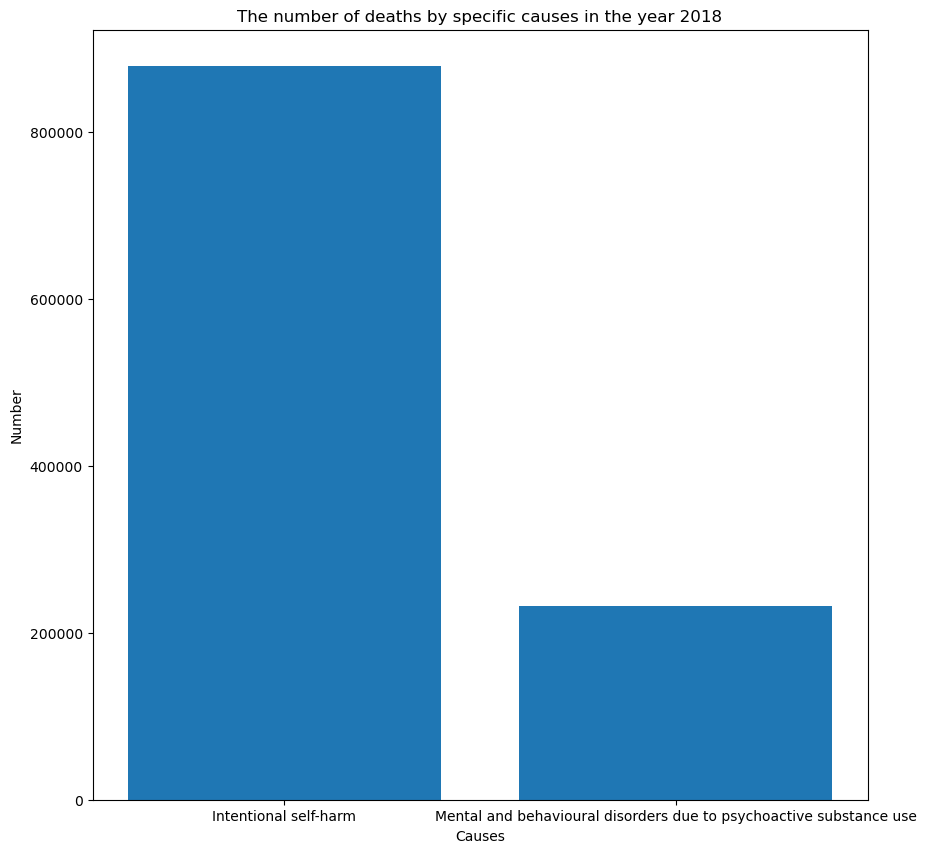

In [18]:
plt.figure(figsize = (10,10))

#Vẽ biểu đồ 
plt.bar(label, cause_of_deaths_total)

#customize chart
plt.title('The number of deaths by specific causes in the year 2018')
plt.xlabel('Causes')
plt.ylabel('Number')
# plt.xticks(rotation = 90)

plt.show()

It can be observed that Intentional self-harm is the leading cause of death. Therefore, let's investigate how the trend of deaths due to intentional self-harm has changed over the 5 years from 2017 to 2021.

##### Intensional Self-harm

In [19]:
#Lấy tổng số lượng tử vong mỗi năm do Intensional Self-harm

Deaths = survey_df.groupby(['Year', 'Cause'])['Deaths'].sum() 
print(Deaths)

Intentional_self_harm = Deaths[Deaths.index.get_level_values('Cause') == 'Intentional self-harm']
print(Intentional_self_harm)
death_column_values = Intentional_self_harm.values
# print(death_column_values)




Year  Cause                                                             
2017  Intentional self-harm                                                 901954
      Mental and behavioural disorders due to psychoactive substance use    235618
2018  Intentional self-harm                                                 878176
      Mental and behavioural disorders due to psychoactive substance use    232032
2019  Intentional self-harm                                                 853500
      Mental and behavioural disorders due to psychoactive substance use    227444
2020  Intentional self-harm                                                 642490
      Mental and behavioural disorders due to psychoactive substance use    223062
2021  Intentional self-harm                                                  64554
      Mental and behavioural disorders due to psychoactive substance use     12384
Name: Deaths, dtype: int64
Year  Cause                
2017  Intentional self-harm    901954
2018

##### Draw a line chart representing each year

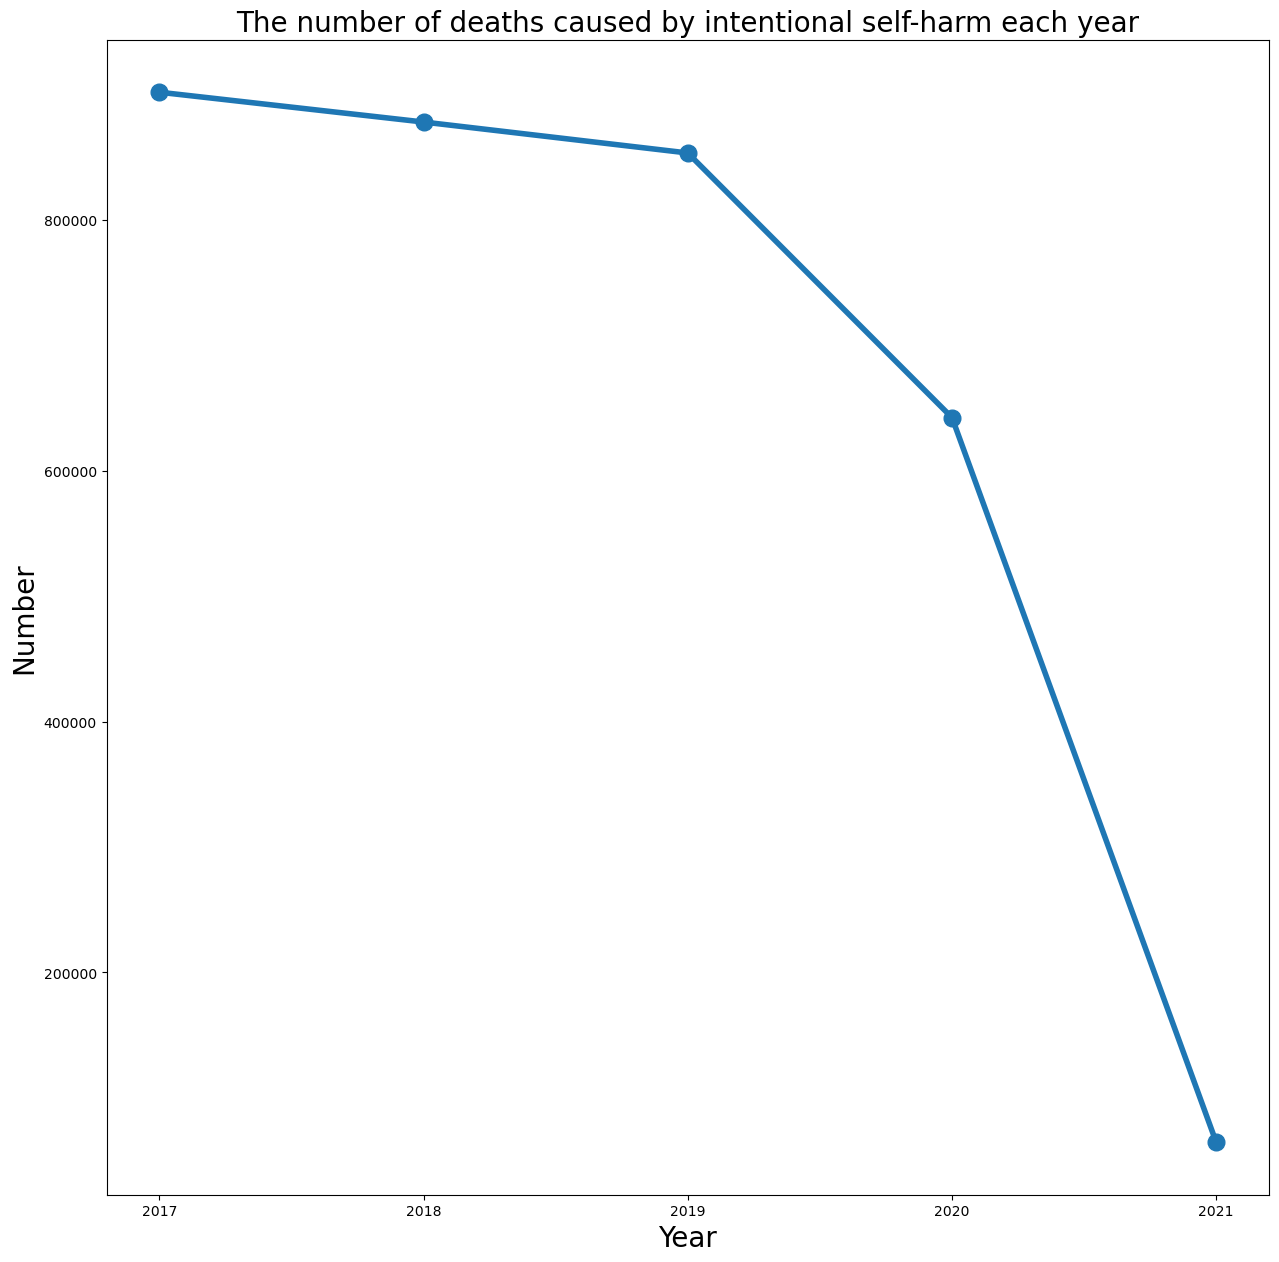

In [20]:
plt.figure(figsize = (15,15))

plt.plot(Intentional_self_harm.index.get_level_values('Year'), death_column_values, marker='o', linewidth = 4, markersize=12)

#customize chart
plt.title('The number of deaths caused by intentional self-harm each year', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number', fontsize = 20)
plt.xticks(np.arange(min(Intentional_self_harm.index.get_level_values('Year')), max(Intentional_self_harm.index.get_level_values('Year')) + 1, 1))

plt.show()

As shown in the chart, it is encouraging that the number of deaths due to Intentional self-harm has decreased continuously over the past 5 years, especially since 2019. Over the years, there has been an observed trend of decreasing mortality rates due to intentional self-harm. This can be understood as indicative of the implementation of effective preventive measures and strategies, which have positively impacted the reduction of suicide risks. Community health and societal efforts to enhance awareness of mental health issues, provide psychological support, and offer effective solutions have contributed to this decline. Additionally, broader prevention strategies, community education, and improved social support may have played pivotal roles in stabilizing and reducing mortality rates attributed to intentional self-harm over time

#### Question 2: Which country has the highest number of deaths each year and what is the number of deaths? Which country has the lowest number of deaths each year and what is the number of deaths? Can a distribution chart be provided?

##### The country has the highest number of deaths each year and the number of deaths

In [21]:
Deaths = survey_df.groupby(['Year', 'Country'])['Deaths'].sum() 
print(Deaths)

#2017
print()
max_2017 = Deaths[Deaths.index.get_level_values('Year') == 2017]
# print(max_2017)
death_column_values_2017 = max_2017.values
print("The highest number of deaths in 2017:",death_column_values_2017.max())
max_2017_country = max_2017.idxmax()[1]
print("The country with the highest number of deaths in 2017:", max_2017_country)

#2018
# print(Deaths[Deaths.index.get_level_values('Country') == 'United States of America'])'
print()
max_2018 = Deaths[Deaths.index.get_level_values('Year') == 2018]
death_column_values_2018 = max_2018.values
print("The highest number of deaths in 2018:",death_column_values_2018.max())
max_2018_country = max_2018.idxmax()[1]
print("The country with the highest number of deaths in 2018:", max_2018_country)

#2019
print()
max_2019 = Deaths[Deaths.index.get_level_values('Year') == 2019]
death_column_values_2019 = max_2019.values
print("The highest number of deaths in 2019:",death_column_values_2019.max())
max_2019_country = max_2019.idxmax()[1]
print("The country with the highest number of deaths in 2019:", max_2019_country)

#2020
print()
max_2020 = Deaths[Deaths.index.get_level_values('Year') == 2020]
death_column_values_2020 = max_2020.values
print("The highest number of deaths in 2020:",death_column_values_2020.max())
max_2020_country = max_2019.idxmax()[1]
print("The country with the highest number of deaths in 2020:", max_2020_country)

#2021
print()
max_2021 = Deaths[Deaths.index.get_level_values('Year') == 2021]
death_column_values_2021 = max_2021.values
print("The highest number of deaths in 2021:",death_column_values_2021.max())
max_2021_country = max_2019.idxmax()[1]
print("The country with the highest number of deaths in 2021:", max_2021_country)



Year  Country            
2017  Andorra                   12
      Antigua and Barbuda       20
      Argentina              14484
      Armenia                  200
      Aruba                     32
                             ...  
2021  San Marino                 2
      Serbia                  4704
      Seychelles                80
      Spain                  17320
      United Kingdom          4328
Name: Deaths, Length: 360, dtype: int64

The highest number of deaths in 2017: 243784
The country with the highest number of deaths in 2017: United States of America

The highest number of deaths in 2018: 250808
The country with the highest number of deaths in 2018: United States of America

The highest number of deaths in 2019: 250564
The country with the highest number of deaths in 2019: United States of America

The highest number of deaths in 2020: 261936
The country with the highest number of deaths in 2020: United States of America

The highest number of deaths in 2021: 17320


##### Draw a line chart representing each year

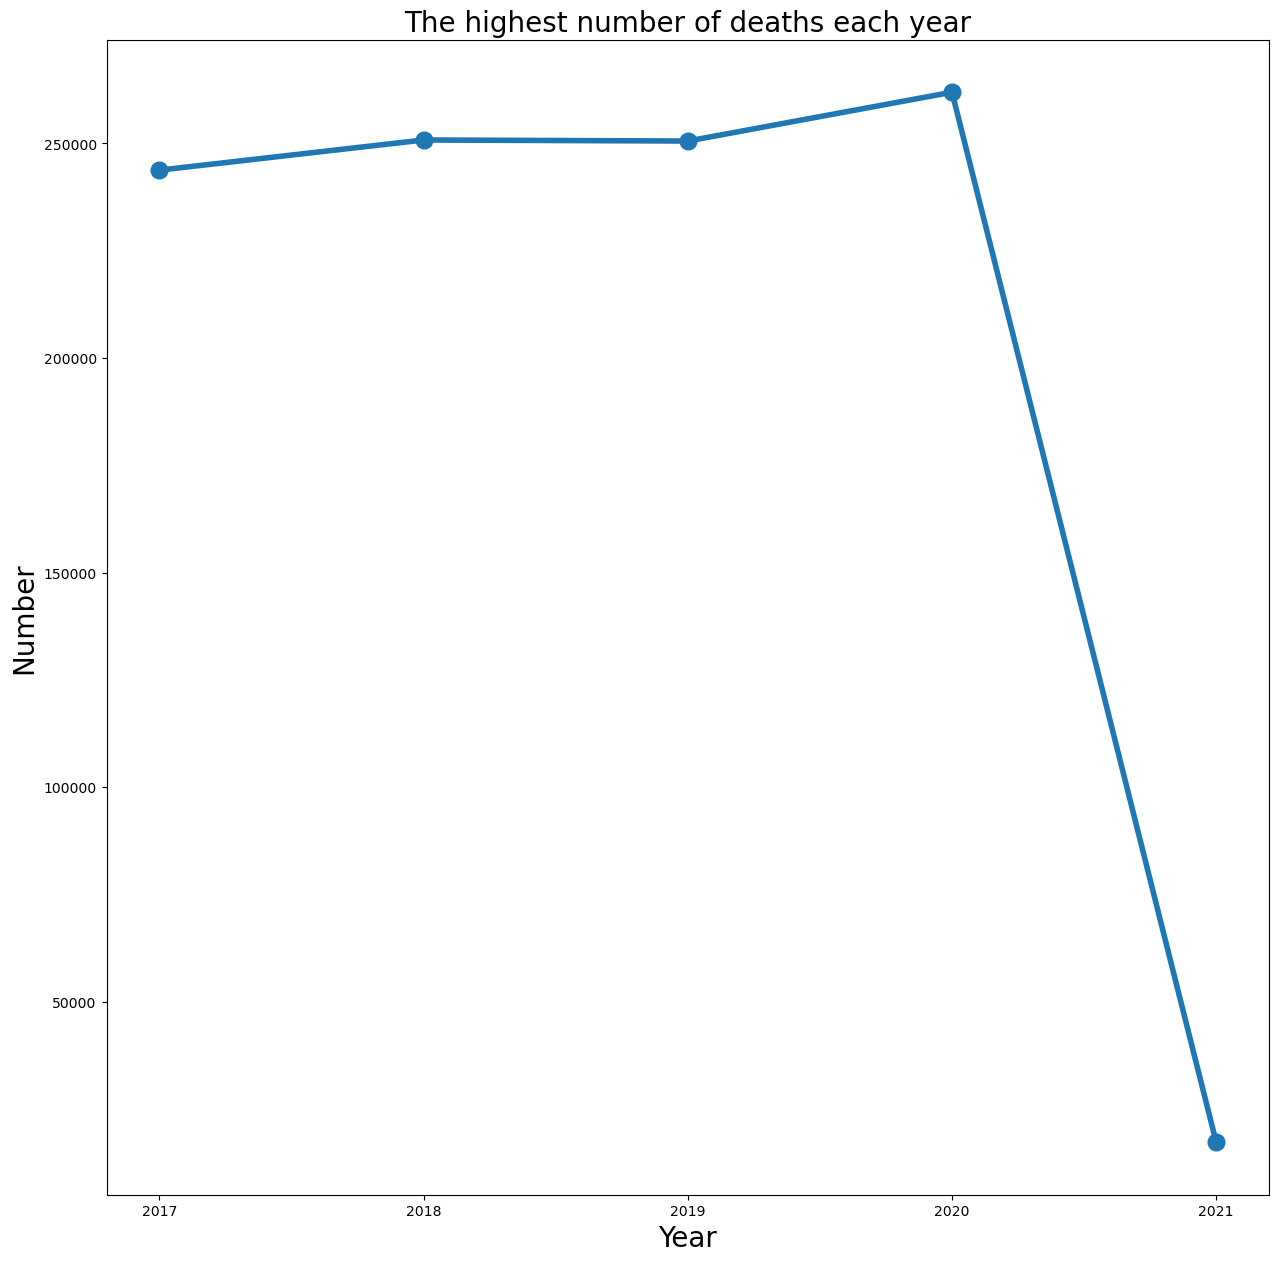

In [22]:
plt.figure(figsize = (15,15))
death_column_values = [death_column_values_2017.max(), death_column_values_2018.max(), death_column_values_2019.max(), death_column_values_2020.max(), death_column_values_2021.max()]
max_death = [max_2017, max_2018, max_2019, max_2020, max_2021]

#np.array(pd.Series(survey_df["Cause"].unique())) 
# print(Deaths.index.get_level_values('Year').unique())
plt.plot(Deaths.index.get_level_values('Year').unique(), death_column_values, marker='o', linewidth = 4, markersize=12)

#customize chart
plt.title('The highest number of deaths each year', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number', fontsize = 20)
plt.xticks(np.arange(min(Deaths.index.get_level_values('Year').unique()), max(Deaths.index.get_level_values('Year').unique()) + 1, 1))

plt.show()

Review of the information on the number of deaths:

- General trend:

    The number of deaths per year has increased from 2017 to 2020, peaking in 2020 with 261,936 deaths.
    However, 2021 saw a sudden drop in the number of deaths, to only 17,320.
- Possible causes of this trend:

    Environment and disease: Population growth, environmental pollution, climate change, and outbreaks of disease (such as the flu in 2020) could be contributing factors to the increase in the number of deaths in previous years.
    Improved healthcare system: Improvements in the healthcare system, medicine, disease control, and life expectancy could be factors leading to the decrease in the number of deaths in 2021.
- Points of interest:

    The United States is consistently the country with the highest number of deaths in the 5 years mentioned. This is noteworthy and requires further investigation into the causes.
    The sudden drop in 2021 needs to be carefully considered, analyzed in detail according to each factor related to health, demographics, and other factors to draw accurate conclusions.


Nhận xét, phân tích về thông tin số người tử vong cao nhất mỗi năm:

- Xu hướng chung:

    Số người tử vong hàng năm có xu hướng tăng từ năm 2017 đến năm 2020, đạt đỉnh vào năm 2020 với 261.936 người tử vong.

    Tuy nhiên, năm 2021 ghi nhận sự sụt giảm đột ngột về số người tử vong, chỉ còn 17.320 người.
- Nguyên nhân có thể gây ra xu hướng này:

    Môi trường và dịch bệnh: Sự gia tăng dân số, ô nhiễm môi trường, thay đổi khí hậu và các đợt bùng phát dịch bệnh (như cúm mùa vào năm 2020) có thể là những yếu tố góp phần làm tăng số người tử vong trong những năm trước.

    Cải thiện hệ thống y tế: Sự cải thiện hệ thống y tế, y học, kiểm soát dịch bệnh và tuổi thọ trung bình có thể là những nhân tố dẫn đến giảm số người tử vong vào năm 2021.
- Điểm đáng chú ý:

    Mỹ liên tục là quốc gia có số người tử vong cao nhất trong 5 năm được đề cập. Điều này đáng chú ý và cần tìm hiểu sâu hơn về nguyên nhân.
    Sự sụt giảm đột ngột trong năm 2021 cần được xem xét kỹ lưỡng, phân tích chi tiết theo từng nguyên nhân liên quan đến y tế, nhân khẩu và các yếu tố khác để đưa ra kết luận chính xác.


##### The country has the lowest number of deaths each year and the number of deaths

In [23]:
Deaths = survey_df.groupby(['Year', 'Country'])['Deaths'].sum()
print(Deaths)

# 2017
print()
min_2017 = Deaths[Deaths.index.get_level_values('Year') == 2017]
death_column_values_2017 = min_2017.values
print("The lowest number of deaths in 2017:", death_column_values_2017.min())
min_2017_country = min_2017.idxmin()[1]
print("The country with the lowest number of deaths in 2017:", min_2017_country)

# 2018
print()
min_2018 = Deaths[Deaths.index.get_level_values('Year') == 2018]
death_column_values_2018 = min_2018.values
print("The lowest number of deaths in 2018:", death_column_values_2018.min())
min_2018_country = min_2018.idxmin()[1]
print("The country with the lowest number of deaths in 2018:", min_2018_country)

# 2019
print()
min_2019 = Deaths[Deaths.index.get_level_values('Year') == 2019]
death_column_values_2019 = min_2019.values
print("The lowest number of deaths in 2019:", death_column_values_2019.min())
min_2019_country = min_2019.idxmin()[1]
print("The country with the lowest number of deaths in 2019:", min_2019_country)

# 2020
print()
min_2020 = Deaths[Deaths.index.get_level_values('Year') == 2020]
death_column_values_2020 = min_2020.values
print("The lowest number of deaths in 2020:", death_column_values_2020.min())
min_2020_country = min_2020.idxmin()[1]
print("The country with the lowest number of deaths in 2020:", min_2020_country)

# 2021
print()
min_2021 = Deaths[Deaths.index.get_level_values('Year') == 2021]
death_column_values_2021 = min_2021.values
print("The lowest number of deaths in 2021:", death_column_values_2021.min())
min_2021_country = min_2021.idxmin()[1]
print("The country with the lowest number of deaths in 2021:", min_2021_country)


Year  Country            
2017  Andorra                   12
      Antigua and Barbuda       20
      Argentina              14484
      Armenia                  200
      Aruba                     32
                             ...  
2021  San Marino                 2
      Serbia                  4704
      Seychelles                80
      Spain                  17320
      United Kingdom          4328
Name: Deaths, Length: 360, dtype: int64

The lowest number of deaths in 2017: 4
The country with the lowest number of deaths in 2017: Dominica

The lowest number of deaths in 2018: 4
The country with the lowest number of deaths in 2018: Anguilla

The lowest number of deaths in 2019: 4
The country with the lowest number of deaths in 2019: Dominica

The lowest number of deaths in 2020: 4
The country with the lowest number of deaths in 2020: San Marino

The lowest number of deaths in 2021: 2
The country with the lowest number of deaths in 2021: San Marino


##### Draw a line chart representing each year

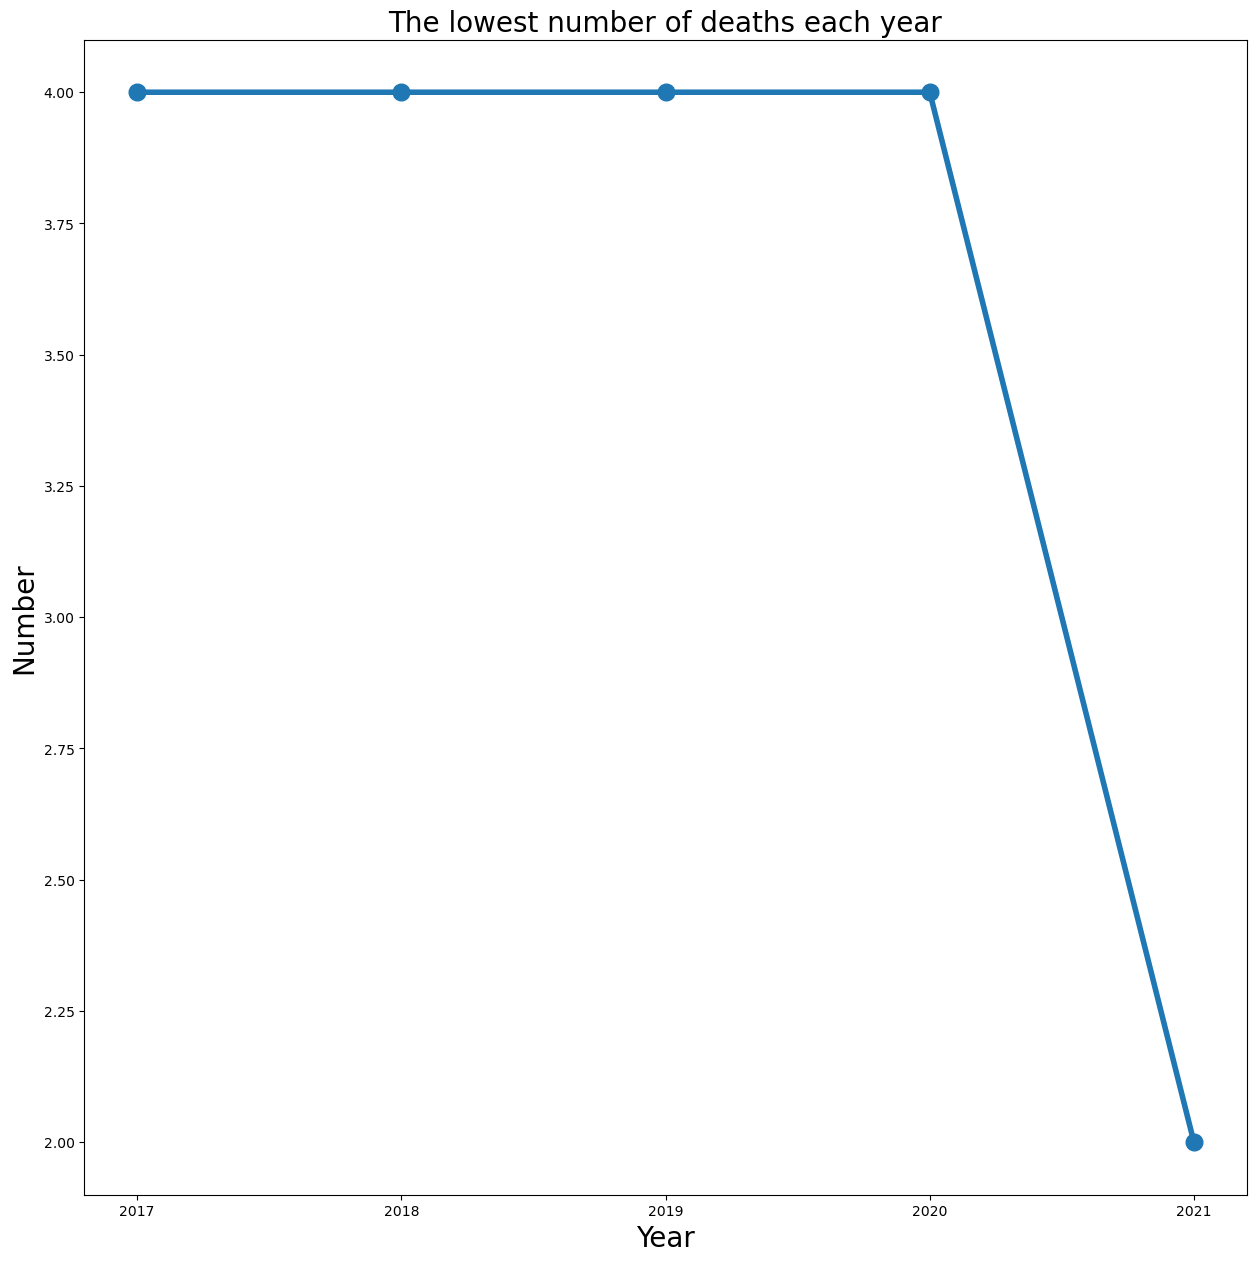

In [24]:
plt.figure(figsize=(15, 15))

death_column_values = [death_column_values_2017.min(), death_column_values_2018.min(), death_column_values_2019.min(), death_column_values_2020.min(), death_column_values_2021.min()]
min_death = [min_2017, min_2018, min_2019, min_2020, min_2021]

plt.plot(Deaths.index.get_level_values('Year').unique(), death_column_values, marker='o', linewidth=4, markersize=12)

# Customize chart
plt.title('The lowest number of deaths each year', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.xticks(np.arange(min(Deaths.index.get_level_values('Year').unique()), max(Deaths.index.get_level_values('Year').unique()) + 1, 1))

plt.show()

Review of the information on the number of deaths:

- General Trend:

    The data shows that the lowest number of deaths in the past five years has consistently fallen within the narrow range of 2-4 individuals. This highlights the existence of a few small nations around the world with remarkably low mortality rates, standing in stark contrast to the hundreds of thousands seen in larger countries.

- Possible Causes of Low Mortality Rates:

    Small Population: The countries mentioned (Dominica, Anguilla, San Marino) all have very small populations, ranging from a few thousand to a few tens of thousand people. A smaller population signifies a lower risk of large-scale disease outbreaks and group-based mortality rates.

    Favorable Living Conditions and Healthcare Systems: While the economic conditions of some of these nations might not be on par with developed countries, they may possess efficient healthcare and social security systems that guarantee basic healthcare for their citizens, contributing to reduced mortality rates.

    Geographical and Environmental Factors: Isolated geographical location, favorable climate, and a clean environment could also be contributing factors to the decline in mortality rates observed in some countries.

- Points of Interest:

    The consistency of the low death toll over the past five years suggests that these countries have likely sustained the positive factors influencing their mortality rates.
    
    Further research into the healthcare models, public health policies, and other specific elements of these nations is crucial to potentially apply their successful strategies to countries with higher mortality rates.

- Conclusion:

    The information about the low number of deaths in certain countries points towards the potential for achieving lower mortality rates worldwide through effective healthcare strategies, improved living environments, and appropriate public health policies. In-depth studies of these successful cases can offer valuable lessons for nations striving to enhance public health and decrease mortality rates.


Nhận xét, phân tích về thông tin số người tử vong thấp nhất mỗi năm:

- Xu hướng chung:

    Dữ liệu cho thấy số người tử vong thấp nhất trong 5 năm qua đều chỉ rơi vào khoảng 2-4 người.
    Điều này cho thấy có một số quốc gia nhỏ trên thế giới có tỷ lệ tử vong rất thấp, đáng chú ý so với con số hàng trăm nghìn của các quốc gia lớn.
- Nguyên nhân có thể gây ra tỷ lệ tử vong thấp:

    Dân số ít: Các quốc gia được đề cập (Dominica, Anguilla, San Marino) đều có dân số rất ít, dao động từ vài nghìn đến vài chục nghìn người. Dân số ít đồng nghĩa với nguy cơ bùng phát dịch bệnh quy mô lớn và tỷ lệ tử vong theo nhóm nhỏ hơn.
    Điều kiện sống và hệ thống y tế tốt: Mặc dù điều kiện kinh tế của một số quốc gia này có thể không cao bằng các quốc gia phát triển, họ có thể có hệ thống y tế và an sinh xã hội hiệu quả, đảm bảo chăm sóc sức khỏe cơ bản cho người dân, góp phần giảm tỷ lệ tử vong.
    Yếu tố địa lý và môi trường: Vị trí địa lý biệt lập, khí hậu thuận lợi và môi trường trong lành cũng có thể là những yếu tố góp phần làm giảm tỷ lệ tử vong ở một số quốc gia.
- Điểm đáng chú ý:

    Sự ổn định của con số người tử vong thấp trong 5 năm qua cho thấy những quốc gia này có thể đã duy trì được các yếu tố tích cực ảnh hưởng đến tỷ lệ tử vong.
    Cần nghiên cứu sâu hơn về các mô hình chăm sóc sức khỏe, chính sách y tế và các nhân tố cụ thể khác của các quốc gia này để có thể áp dụng những bài học kinh nghiệm vào các quốc gia có tỷ lệ tử vong cao hơn.

- Kết luận:

    Thông tin về số người tử vong thấp ở một số quốc gia cho thấy tiềm năng đạt được tỷ lệ tử vong thấp hơn trên toàn thế giới thông qua các chiến lược chăm sóc sức khỏe hiệu quả, môi trường sống tốt và các chính sách y tế phù hợp. Nghiên cứu sâu hơn về các trường hợp thành công này có thể cung cấp những bài học quý giá cho các quốc gia đang nỗ lực cải thiện sức khỏe người dân và giảm tỷ lệ tử vong.

#### Question 3: What is the total number of deaths each year? How many deaths are there for each type of causes each year? Is there any chart to represent these changes?

##### The total number of deaths each year

In [25]:
#Tính tổng ca tử vong mỗi năm
year_total_death = []

year_total_death = survey_df.groupby(['Year'])['Deaths'].sum() 
print(year_total_death)



Year
2017    1137572
2018    1110208
2019    1080944
2020     865552
2021      76938
Name: Deaths, dtype: int64


##### Draw a line chart representing each year

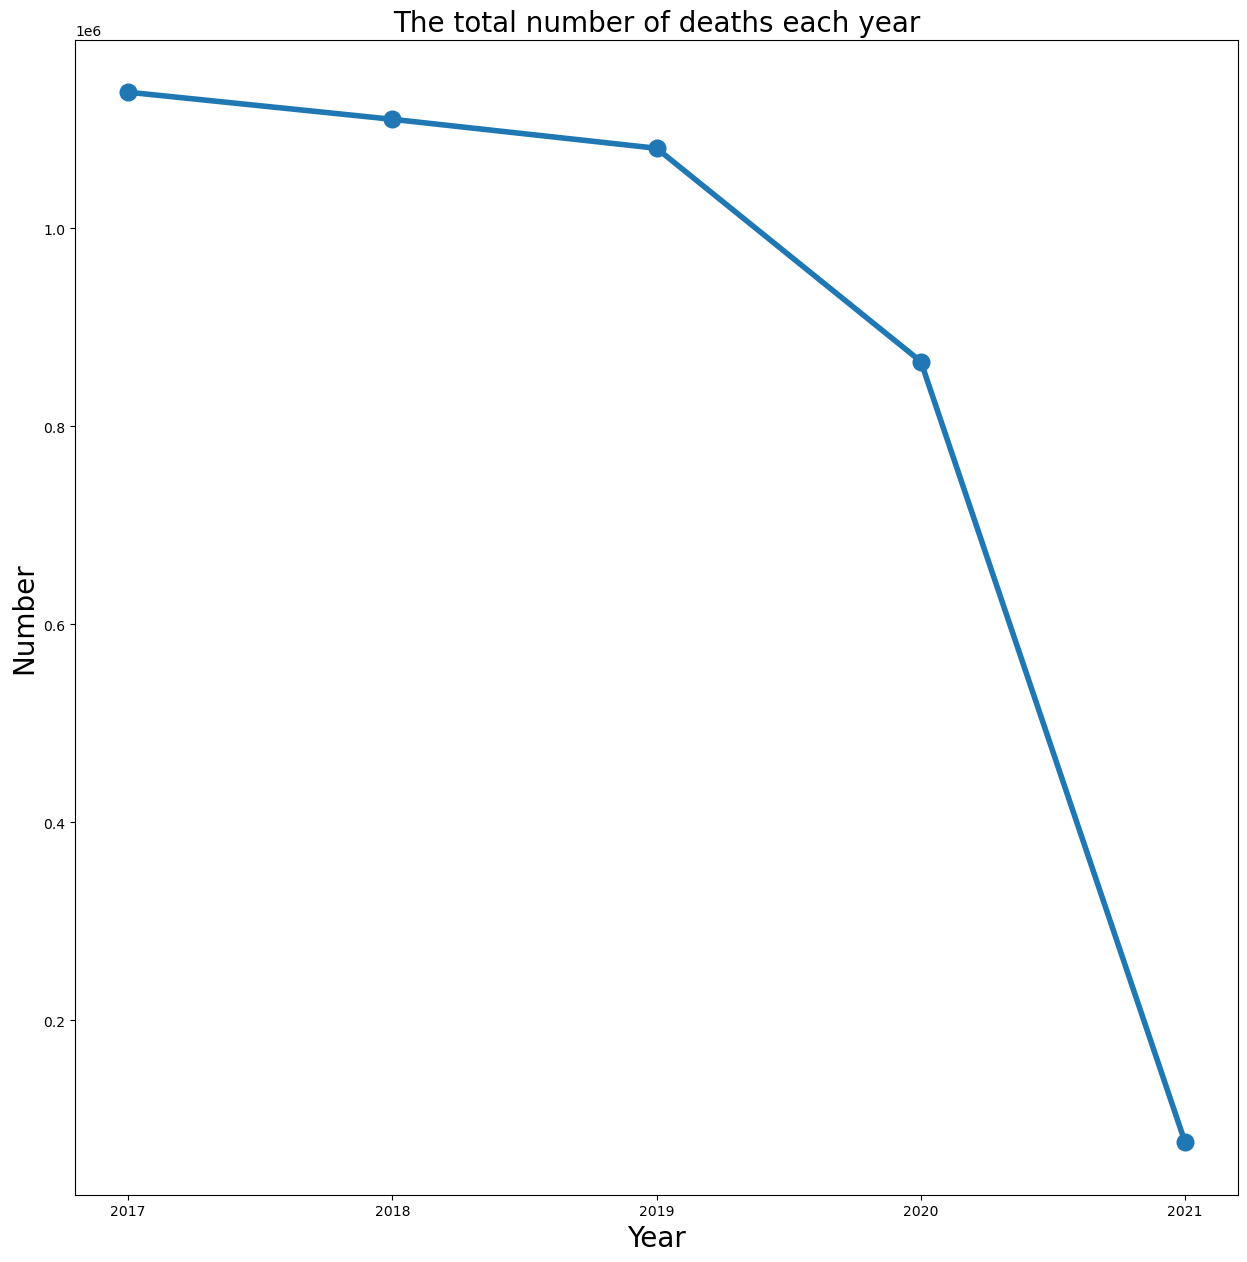

In [26]:
plt.figure(figsize=(15, 15))

plt.plot(year_total_death.index.get_level_values('Year'), year_total_death, marker='o', linewidth=4, markersize=12)

# Customize chart
plt.title('The total number of deaths each year', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.xticks(np.arange(min(Deaths.index.get_level_values('Year').unique()), max(Deaths.index.get_level_values('Year').unique()) + 1, 1))

plt.show()

##### Total of deaths for each type of causes each year

In [27]:
#Tính tổng ca tử vong theo từng nguyên nhân, lưu vào list cause_of_deaths_total
cause_of_deaths_total = survey_df.groupby(['Cause','Year'])['Deaths'].sum()
print(cause_of_deaths_total)

#List chứa tên từng nguyên nhân gây tử vong
label = np.array(pd.Series(survey_df["Cause"].unique())) 
# print(label)

Cause                                                               Year
Intentional self-harm                                               2017    901954
                                                                    2018    878176
                                                                    2019    853500
                                                                    2020    642490
                                                                    2021     64554
Mental and behavioural disorders due to psychoactive substance use  2017    235618
                                                                    2018    232032
                                                                    2019    227444
                                                                    2020    223062
                                                                    2021     12384
Name: Deaths, dtype: int64


##### Draw a bar chart illustrating the number of deaths for each type of causes each year

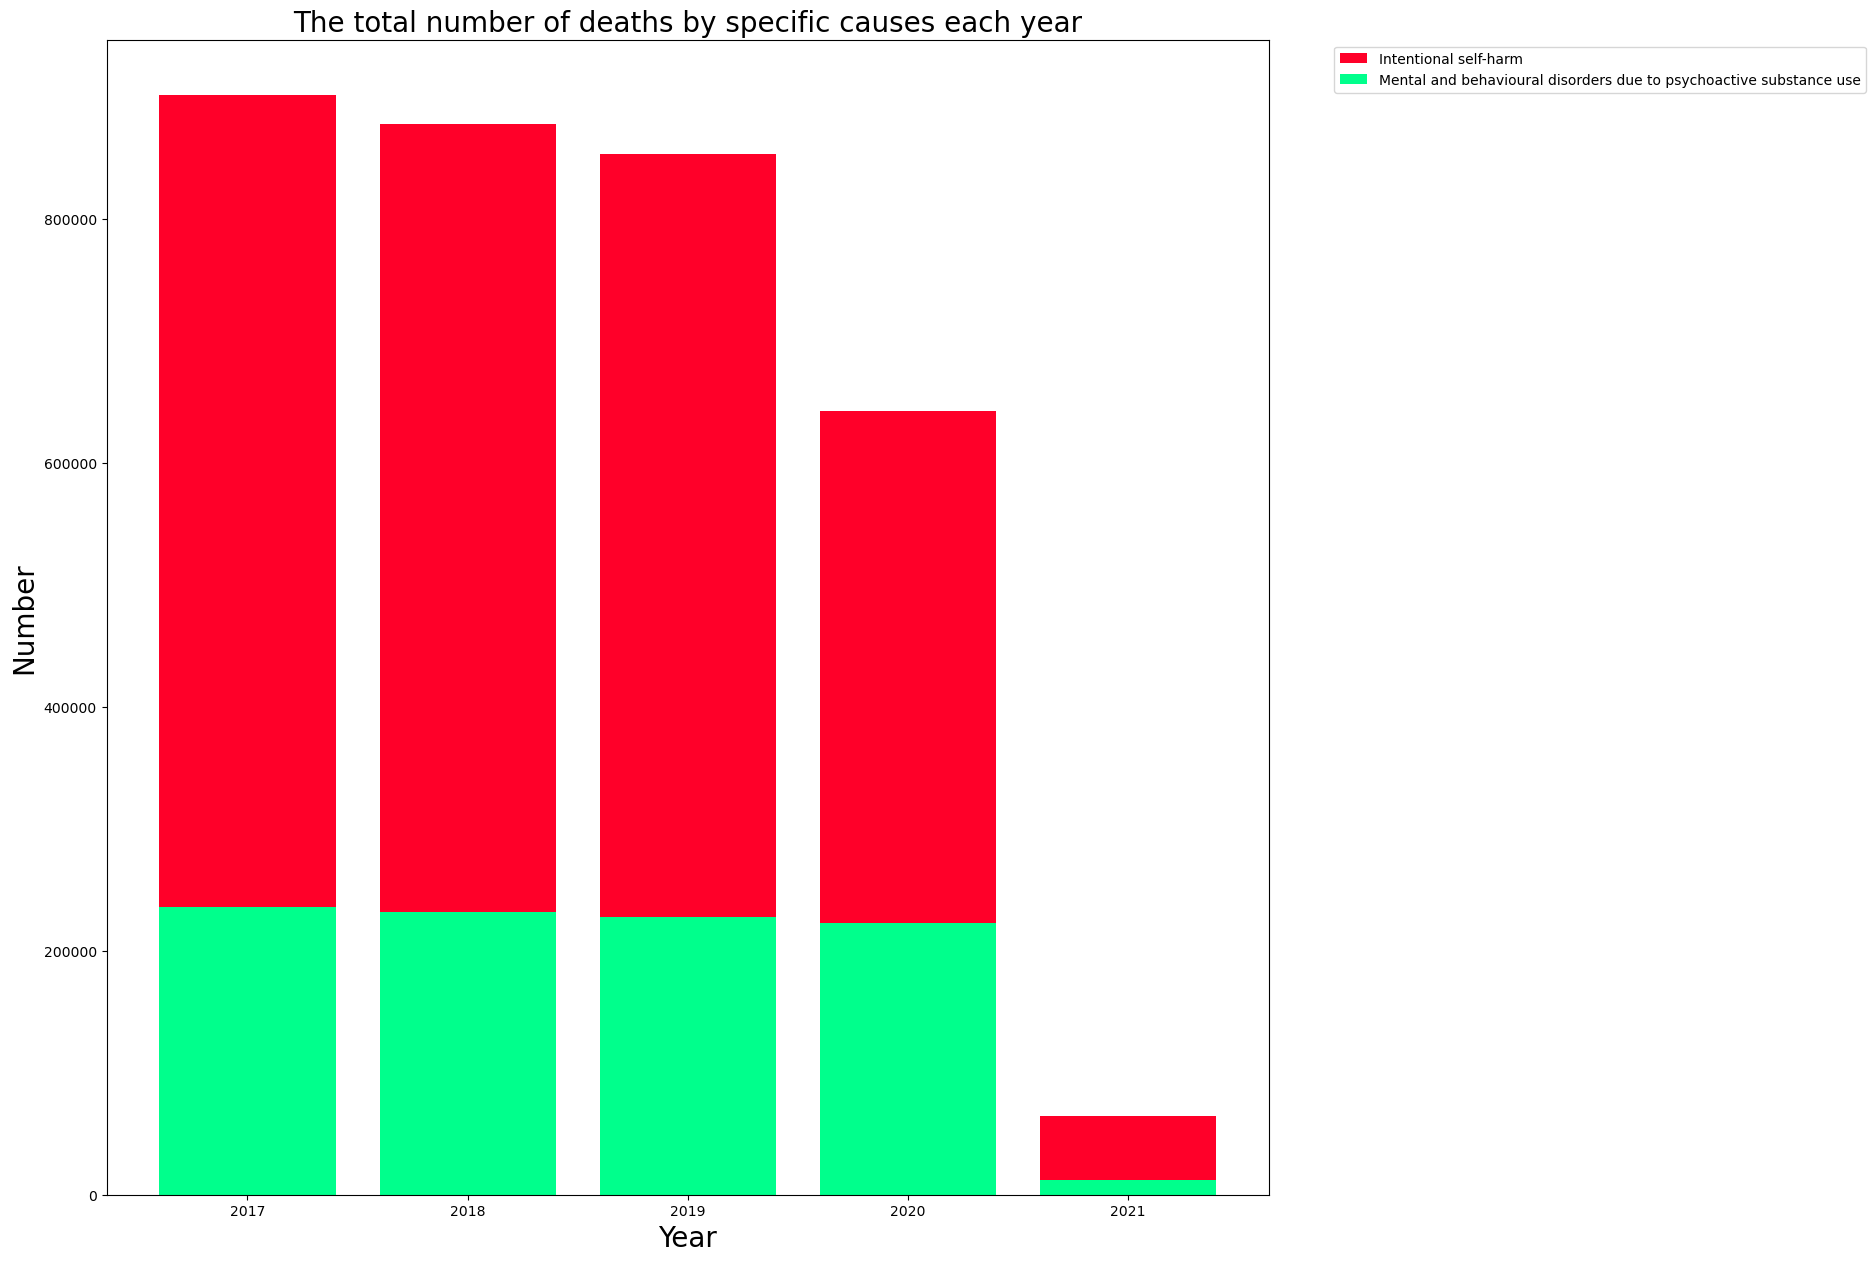

In [28]:

fig = plt.figure(figsize=(15, 15))
NUM_COLORS = len(cause_of_deaths_total.index.get_level_values('Cause').unique())

cm = plt.get_cmap('gist_rainbow')
ax = fig.add_subplot(111)
ax.set_prop_cycle('color', [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

years = cause_of_deaths_total.index.get_level_values('Year').unique()
causes = cause_of_deaths_total.index.get_level_values('Cause').unique()

for i, cause in enumerate(causes):
    deaths = cause_of_deaths_total[cause]
    plt.bar(years, deaths, label=cause)

# Customize chart
plt.title('The total number of deaths by specific causes each year', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.xticks(np.arange(min(years), max(years) + 1, 1))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()


Analysis of Information on Total of deaths for each type of causes each year

- General Trends:

    The data shows a clear downward trend in the number of deaths from both intentional self-harm and mental and behavioral disorders due to psychoactive substance use over the period 2017-2021.

    The number of people who died by suicide decreased from 901,954 in 2017 to 64,554 in 2021.
    
    Similarly, the number of deaths from mental and behavioral disorders due to substance use dropped from 235,618 in 2017 to 12,384 in 2021.

- Possible Causes for the Trends:

    Improved awareness and action on mental health: In recent years, there has been a significant increase in global awareness about mental health issues. This has led to a greater tendency for individuals to seek help when facing mental health challenges, potentially reducing the risk of suicide and substance-induced disorders.

    Enhanced mental health care systems: Many countries have made investments in strengthening their mental health care systems, including improving access to services, enhancing the quality of care, and reducing the cost of treatment. These efforts are also likely contributing to the decline in deaths from suicide and substance-related disorders.

- Points of Interest:

    The dramatic decrease in suicide deaths in 2021 is a particularly positive sign. This could be partly attributed to the impact of the COVID-19 pandemic, which heightened awareness of the importance of mental health and encouraged individuals to seek support.
    
    Despite the overall downward trend, deaths from mental and behavioral disorders due to substance use remain high, especially in developing nations. This underscores the need for further efforts to improve awareness and action on mental health, particularly among vulnerable populations.

- Conclusion:

    The information regarding deaths by cause reveals a significant reduction in both suicide and substance-induced mental health disorder fatalities between 2017 and 2021. This suggests that the international community's efforts to improve mental health are yielding positive results. However, significant challenges remain, particularly in developing countries, demanding continued and targeted interventions.

Nhận xét, đánh giá về tổng số người chết mỗi năm do từng nguyên nhân:

- Xu hướng chung:

    Số người chết do tự tử và rối loạn tâm thần do sử dụng chất kích thích có xu hướng giảm trong giai đoạn 2017-2021.

    Số người chết do tự tử giảm từ 901.954 người năm 2017 xuống còn 64.554 người năm 2021.

    Số người chết do rối loạn tâm thần do sử dụng chất kích thích giảm từ 235.618 người năm 2017 xuống còn 12.384 người năm 2021.

- Nguyên nhân có thể gây ra xu hướng này:

    Cải thiện nhận thức và hành động về sức khỏe tâm thần: Trong những năm gần đây, nhận thức về sức khỏe tâm thần đã được cải thiện đáng kể trên toàn thế giới. Điều này dẫn đến việc nhiều người có xu hướng tìm kiếm sự giúp đỡ khi gặp vấn đề về sức khỏe tâm thần, từ đó giảm nguy cơ tự tử và các rối loạn tâm thần do sử dụng chất kích thích.
    
    Cải thiện hệ thống chăm sóc sức khỏe tâm thần: Nhiều quốc gia đã đầu tư vào việc cải thiện hệ thống chăm sóc sức khỏe tâm thần, bao gồm tăng cường tiếp cận dịch vụ chăm sóc sức khỏe tâm thần, nâng cao chất lượng dịch vụ và giảm chi phí chăm sóc sức khỏe tâm thần. Điều này cũng góp phần làm giảm số người chết do tự tử và rối loạn tâm thần do sử dụng chất kích thích.

- Điểm đáng chú ý:

    Sự sụt giảm đáng kể về số người chết do tự tử trong năm 2021 là một tín hiệu tích cực. Điều này có thể là do tác động của đại dịch COVID-19, khiến nhiều người nhận thức rõ hơn về tầm quan trọng của sức khỏe tâm thần và tìm kiếm sự giúp đỡ.
    
    Số người chết do rối loạn tâm thần do sử dụng chất kích thích vẫn ở mức cao, đặc biệt là ở các quốc gia đang phát triển. Điều này cho thấy cần có nhiều nỗ lực hơn nữa để cải thiện nhận thức và hành động về sức khỏe tâm thần, đặc biệt là ở các nhóm dân số dễ bị tổn thương.

- Kết luận:

    Thông tin về tổng số người chết do từng nguyên nhân cho thấy xu hướng giảm đáng kể về số người chết do tự tử và rối loạn tâm thần do sử dụng chất kích thích trong giai đoạn 2017-2021. Đây là một tín hiệu tích cực cho thấy nỗ lực của cộng đồng quốc tế trong việc cải thiện sức khỏe tâm thần đang mang lại hiệu quả. Tuy nhiên, vẫn còn nhiều thách thức cần được giải quyết, đặc biệt là ở các quốc gia đang phát triển.